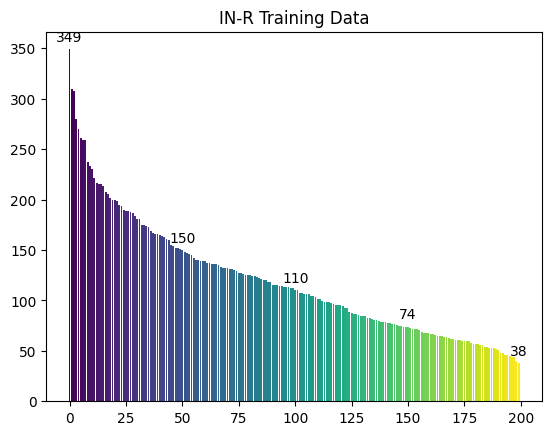

In [14]:
import matplotlib.pyplot as plt  
import numpy as np  
  
# 加载数据  
np.random.seed(0)  # 为了可复现性，设置随机种子  
data = torch.load('../res/imagenetr_train_num.pth')  # 生成200个10到400之间的随机整数  
  
# 对数据进行从大到小的排序  
sorted_data = sorted(data, reverse=True) 
  
# 创建一个颜色映射  
cmap = plt.get_cmap('viridis')  # 使用viridis颜色映射  
colors = cmap(np.linspace(0, 1, len(sorted_data)))  # 生成颜色  
  
# 绘制条形图，为每个条形分配不同的颜色  
fig, ax = plt.subplots()  
bars = ax.bar(range(len(sorted_data)), sorted_data, color=colors)  
  
# 标记头尾以及每50个条形图的数量  
labels_to_add = [0]  # 初始列表，包含第一个索引  
for i in range(50, len(sorted_data), 50):  # 从第50个开始，每隔50个添加一个索引  
    labels_to_add.append(i)  
labels_to_add.append(len(sorted_data) - 1)  # 添加最后一个索引  
  
for i in labels_to_add:  
    ax.text(i, sorted_data[i] + 5, str(sorted_data[i]), ha='center', va='bottom')  # 在条形图上方添加文本  
  
# 设置图的标题  
ax.set_title('IN-R Training Data')  
  
# 显示图形  
plt.show()

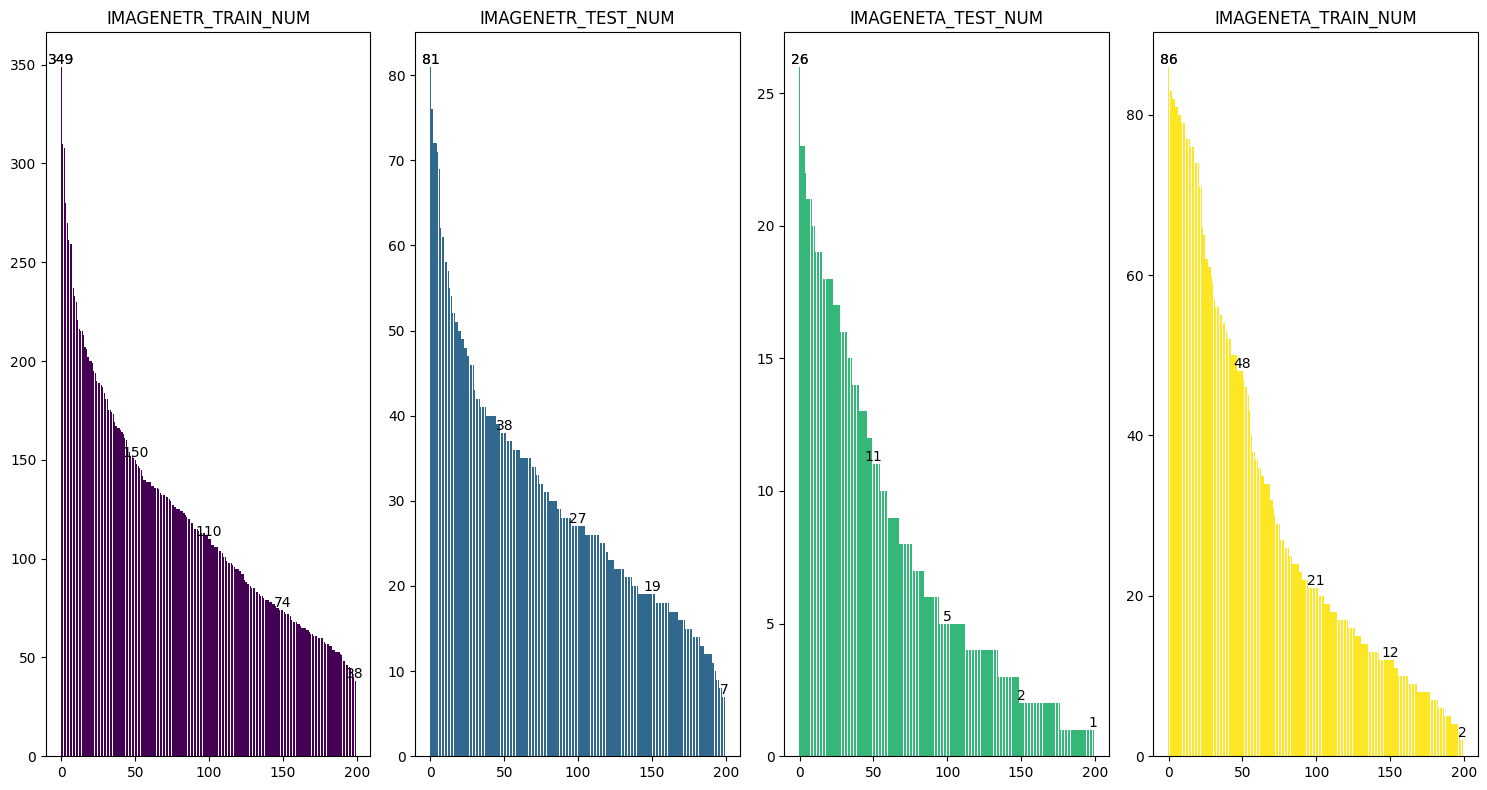

In [38]:
import torch  
import matplotlib.pyplot as plt  
  
# 假设你的.pth文件保存的是一维张量  
def load_data_from_pth(file_path):  
    # 加载.pth文件中的数据  
    data = torch.load(file_path)  
    # 将数据从大到小排序  
    sorted_data = sorted(data, reverse=True)  
    return sorted_data 
  
# 假设你有四个.pth文件的路径 
pth_files = ['imagenetr_train_num.pth', 'imagenetr_test_num.pth', 'imageneta_test_num.pth', 'imageneta_train_num.pth'] 
  
# 加载数据
data_list = []  
for file_path in pth_files:  
    sorted_data= load_data_from_pth('../res/' + file_path)  
    data_list.append(sorted_data)  
  
# 创建一个颜色映射  
cmap = plt.get_cmap('viridis')  
colors = [cmap(i / (len(pth_files) - 1)) for i in range(len(pth_files))]  # 为每个数据集生成不同的颜色  
  
# 创建一个图形和轴对象  
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 8))  
ax_index = 0
# 绘制每个子图  
for ax, data, color in zip(axs, data_list, colors):  
    ax.bar(range(len(data)), data, color=color)  
      
    # 设置x轴和y轴的标签  
      
    # 设置图的标题  
    ax.set_title(pth_files[ax_index].split('.')[0].upper())
    ax_index += 1
      
    # 标记头尾以及每50个条形图的数量  
    ax.text(0, data[0] , str(data[0]), ha='center', va='bottom')  # 头部  
    ax.text(199, data[-1] , str(data[-1]), ha='center', va='bottom')  # 尾部  
    for i in range(0, len(data), 50):  
        ax.text(i, data[i] , str(data[i]), ha='center', va='bottom')  # 每50个  
         
  
# 调整子图之间的间距  
plt.tight_layout()  
  
# 显示图形  
plt.show()